In [1]:
%cd ..

d:\HUST\20232\ML\Project_OCR\HandwritingRecognition


In [2]:
import os
import zipfile
import shutil

import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image

from utils import utils

c:\Users\tandat17z\anaconda3\envs\env_tandat17z\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Đọc dữ liệu từ file zip

In [13]:
def extract_zip(zip_file, extract_to):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

In [14]:
extract_zip('data/raw/InkData_line_processed.zip', 'data/root')

In [15]:
len(os.listdir('data/root/InkData_line_processed/'))

14564

# Di chuyển file

In [3]:
root = 'data/root'
dataPath = 'InkData_line_processed'

In [29]:
ls = ['abd']
ls.append('abd')
ls

['abd', 'abd']

In [33]:
cnt = 0
char_count = []
len_list = []
size = []
list_str = {}

for path in os.listdir(root + '/' + dataPath):
    ext = ('png', 'PNG', 'JPG', 'jpg', 'JPEG', 'jpeg')
    if path.endswith(ext):
        imgpath = root + '/' + dataPath + '/' + path
        labelpath = root + '/' + dataPath + '/' + os.path.splitext(path)[0] + '.txt'

        # Đọc text
        with open(labelpath, 'r') as f:
            content = f.readline().rstrip('\n').strip()
            # if '-' in content:
            #     print(path)
            # char_list.update(set(content))
            char_count.append(len(content))
            len_list.append(len(content.split()))
            
        if len(content) in range(40, 90):
            num = len(content)
            if num in list_str.keys():
                list_str[num].append(path)
            else:
                list_str[num] = [path]

        # Đọc img
        # if len(content) in range(40, 100):
        #     img = Image.open(imgpath).convert('L')
        #     img = img.point(lambda p: 255 - p) # chuyển background về màu đen 0

        #     img = utils.cropImg(img)
        #     w, h = img.size
        #     # size.append(img.size)
        #     if w / h < 512/32:
        #         img.show()
        #         print(content)
        #         # print(imgpath)
        #         invalid_img.append(imgpath)
        #         invalid_cnt.append(len(content))
        #         break
        # Di chuyển file------------------------------------------
        # if len(content) in range(51, 96):
        #     shutil.copy(imgpath, 'data/4/img') # Di chuyển file 
        #     shutil.copy(labelpath, 'data/4/label') # Di chuyển file 

## split data

In [34]:
len(list_str)

50

In [41]:
from sklearn.model_selection import train_test_split

train_data = []
test_data = []
for k in list_str:
    train, test = train_test_split(list_str[k], test_size = 0.2, random_state=42)
    train_data.extend(train)
    test_data.extend(test)

In [45]:
print(len(train_data))
root = 'data/root'
dataPath = 'InkData_line_processed'
for path in train_data:
    imgpath = root + '/' + dataPath + '/' + path
    labelpath = root + '/' + dataPath + '/' + os.path.splitext(path)[0] + '.txt'

    shutil.copy(imgpath, 'data/train/img') # Di chuyển file 
    shutil.copy(labelpath, 'data/train/label') # Di chuyển file 

4936


In [46]:
print(len(test_data))
root = 'data/root'
dataPath = 'InkData_line_processed'
for path in test_data:
    imgpath = root + '/' + dataPath + '/' + path
    labelpath = root + '/' + dataPath + '/' + os.path.splitext(path)[0] + '.txt'

    shutil.copy(imgpath, 'data/test/img') # Di chuyển file 
    shutil.copy(labelpath, 'data/test/label') # Di chuyển file 

1255


In [49]:
len(os.listdir('data/train/img')), len(os.listdir('data/test/label'))

(4936, 1255)

In [47]:
assert len(os.listdir('data/train/img')) == len(os.listdir('data/train/label'))

In [48]:
assert len(os.listdir('data/test/img')) == len(os.listdir('data/test/label'))

## check size

In [19]:
invalid_img = []
for path in os.listdir(root + '/img'):
    imgpath = root + '/img/' + path
    labelpath = root + '/label/' + os.path.splitext(path)[0] + '.txt'

    # Đọc text
    # with open(labelpath, 'r') as f:
    #     content = f.readline().rstrip('\n').strip()
    #     # if '-' in content:
    #     #     print(path)
    #     # char_list.update(set(content))
    #     char_count.append(len(content))
    #     len_list.append(len(content.split()))
        
    # Đọc img
    img = Image.open(imgpath).convert('L')
    w, h = img.size
    # size.append(img.size)
    if w / h > 512/32:
        print(imgpath)
        invalid_img.append(imgpath)
    

# Lọc các file

In [2]:
import os

def read_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            return content
    except FileNotFoundError:
        return f"File {file_path} không tồn tại."

def delete_file(file_path):
    try:
        os.remove(file_path)
        return
    except FileNotFoundError:
        return f"File {file_path} không tồn tại."

def count_words(text):
    return len(text.split())

In [37]:
cnt = 0
list_len = []
char_list = set()
root = 'data/1'
for path in os.listdir(root + '/img'):
    ext = ('png', 'PNG', 'JPG', 'jpg', 'JPEG', 'jpeg')
    if path.endswith(ext):
        imgpath = root + '/img/' + path
        labelpth = root + '/label/' + os.path.splitext(path)[0] + '.txt'

        with open(labelpth, 'r') as f:
            content = f.readline().rstrip('\n').strip()
            # if '-' in content:
            #     print(path)
            char_list.update(set(content))
            char_count = len(content)
            list_len.append(char_count)
            
        if char_count in range(51, 96):
            cnt += 1
            # shutil.move(imgpath, 'data/img/') # Di chuyển file 
            # shutil.move(labelpth, 'data/label/') # Di chuyển file 
cnt

6273

In [38]:
l = list(char_list)
char = ''.join(sorted(l))
char


' !"%&(),-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYabcdefghijklmnopqrstuvxyzÁÂÔÚÝàáâãèéêìíòóôõùúýĂăĐđĩũƠơƯưạảẤấẦầẩẫậắằẳẵặẹẻẽếềểễệỉịọỏốỒồổỗộớờỞởỡợụỦủứừửữựỳỷỹ'

In [39]:
len(char)

154

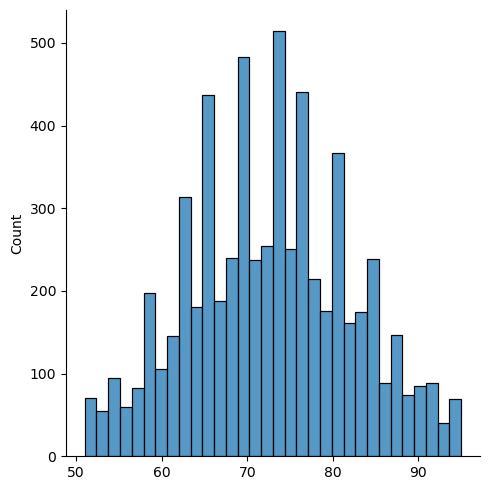

In [5]:
sns.displot(list_len)

# Visulization

In [8]:
from dataset import DatasetImg
from PIL import Image
import os
import matplotlib.pyplot as plt

from utils import utils

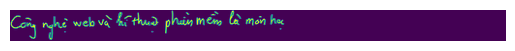

In [11]:
img = utils.img_loader('data/test/z5385735245897_5fe4592d884adf79a384639b30f438c7.jpg')
plt.imshow(img[0])
plt.axis('off')
plt.show()

In [27]:
def display(imgdata, num = 5, raw = True):
    if raw:
        for i, imgpath in enumerate(os.listdir(imgdata)):
            img = Image.open(imgdata + '/' + imgpath)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            if i > num : break
    else:
        for i, imgpath in enumerate(os.listdir(imgdata)):
            img = utils.img_loader(imgdata + '/' + imgpath)
            plt.imshow(img[0])
            plt.axis('off')
            plt.show()
            if i > num : break

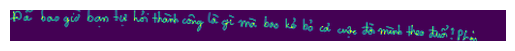

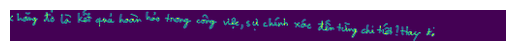

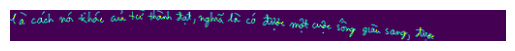

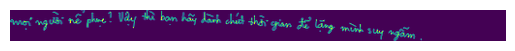

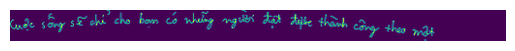

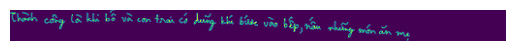

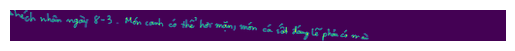

In [28]:
display('data/data1/img', raw = False)